# Práctica 1

José Ignacio Tejero Ruiz, Miguel Angel Lobo Bartolomé, Diego Viñals Lage.

In [2]:
# Importamos las librerias necesarias para poder depurar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Parte 1

In [3]:
# Leemos el DataSet airbnb.csv
airbnbs = pd.read_csv('./DatasetsLab1/airbnb.csv', encoding='latin-1')
airbnbs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


### Eliminamos los valores NaN.

In [4]:
# Eliminamos los valores No Númericos (NaN) del csv airbnb.csv
airbnbs = airbnbs.dropna()


### Eliminamos valores duplicados.

In [5]:
# Eliminamos los valores duplicados del csv airbnb.csv
airbnbs = airbnbs.drop_duplicates() #elimina las filas duplicadas


### Filtramos las columnas que nos interesen de todo el dataframe.

La columna de reseñas por mes, las dividimos en 3 rangos iguales, después dependiendo del valor concreto que tenga cada apartamento se le asignarán las etiquetas: “Baja”, “Media” y ”Alta”. 

In [6]:
# Filtramos en el .csv la columna reviews_per_month
columnaResenasMes = airbnbs[["reviews_per_month"]] 
# Mostramos las 10 primeras filas del .csv para confirmar que lo hemos hecho bien
columnaResenasMes.head(10) 

,reviews_per_month
0,0.21
1,0.38
3,4.64
4,0.10
5,0.59
6,0.40
7,3.47
8,0.99
9,1.33
10,0.43


Para saber como dividir en 3 grupos los valores, vamos a ver cual es el valor máximo y cual es el valor mínimo de esta columna. 
De esta forma, en función del valor resultante se asignará a los grupos calidad baja, media y alta.

In [7]:
maxResenas = columnaResenasMes.max()
print(str(maxResenas))
minResenas = columnaResenasMes.min()
print(str(minResenas))

reviews_per_month    58.5
dtype: float64
reviews_per_month    0.01
dtype: float64


### Dividimos 58.5 entre tres para dividir por grupos:

In [8]:
maxResenas/3

reviews_per_month    19.5
dtype: float64

#### Calidad Baja los valores irían de: 0 a 19.4.
#### Calidad Media los valores irían de: 19.5 a 39.
#### Calidad Alta los valores irían de: 39 a 58.5.
### Creamos otra columna, con la calidad, en la que añadiremos "Baja" "Media" y "Alta" según los valores mostrados arriba.

In [62]:
#for index in range(columnaResenasMes.shape)):
  #  print(index)
airbnbs["Calidad"] = "None"
airbnbs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Disponibilidad,Calidad
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,Altamente disponible,None
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,Altamente disponible,None
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,Disponible normalmente,None
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,Poco disponible,None
5,5099.0,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,Disponible normalmente,None
6,5121.0,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,Poco disponible,None
7,5178.0,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0,Disponible normalmente,None
8,5203.0,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0,Poco disponible,None
9,5238.0,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0,Disponible normalmente,None
10,5295.0,Beautiful 1br on Upper West Side,7702.0,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,2019-06-22,0.43,1.0,6.0,Poco disponible,None


In [63]:

airbnbs[["reviews_per_month", "Calidad"]]
airbnbs.dropna().head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Disponibilidad,Calidad
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,Altamente disponible,None
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,Altamente disponible,None
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,Disponible normalmente,None
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,Poco disponible,None
5,5099.0,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,Disponible normalmente,None
6,5121.0,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,Poco disponible,None
7,5178.0,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0,Disponible normalmente,None
8,5203.0,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0,Poco disponible,None
9,5238.0,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0,Disponible normalmente,None
10,5295.0,Beautiful 1br on Upper West Side,7702.0,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,2019-06-22,0.43,1.0,6.0,Poco disponible,None


#### A continuación, realizaremos un bucle for para que asigne calidad "Baja", "Media" o "Alta" en función de los valores de reseñas/mes que tenga el apartamento. 

#### Los valores de 0 a 19.4, tienen una calidad Baja.
#### Los valores de 19.5 a 39, tienen una calidad Media.
#### Los valores de 39 a 58.5, tienen una calidad Alta.

In [64]:
for i, items in enumerate(airbnbs["reviews_per_month"].values):
    if items < 19.5:
        airbnbs.loc[i, "Calidad"] = "Baja"
    elif items >= 19.5 and items < 39: 
        airbnbs.loc[i, "Calidad" ] = "Media"
    elif items >= 39: 
        airbnbs.loc[i, "Calidad" ] = "Alta"
    
airbnbs.dropna()
airbnbs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Disponibilidad,Calidad
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,Altamente disponible,Baja
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,Altamente disponible,Baja
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,Disponible normalmente,Baja
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,Poco disponible,Baja
5,5099.0,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,Disponible normalmente,Baja
6,5121.0,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,Poco disponible,Baja
7,5178.0,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0,Disponible normalmente,Baja
8,5203.0,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0,Poco disponible,Baja
9,5238.0,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0,Disponible normalmente,Baja
10,5295.0,Beautiful 1br on Upper West Side,7702.0,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,2019-06-22,0.43,1.0,6.0,Poco disponible,Baja


      
### Una vez tenemos la columna "Calidad" creada, haremos lo mismo con la columna "Disponibilidad".

La columna "Disponibilidad", la dividimos en 3 rangos iguales. Después, dependiendo del valor concreto que tenga cada apartamento, se le asignarán las etiquetas: "Poco Disponnible", "Disponible normalmemte", "Altamente disponible".
Como hay 365 dias, dividimos los rangos en 122.
Los valores de 0 a 122 indican Poca dispoibilidad.
Los valores de 122 a 244 indican Media disponibilidad.
Los valores de 224 a 365 indican Alta disponibilidad.

In [65]:
# Mostramos la columna "Disponibilidad" vacía.
airbnbs["Disponibilidad"] = ""
airbnbs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Disponibilidad,Calidad
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,,Baja
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,,Baja
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,,Baja
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,,Baja
5,5099.0,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,,Baja
6,5121.0,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,,Baja
7,5178.0,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0,,Baja
8,5203.0,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0,,Baja
9,5238.0,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0,,Baja
10,5295.0,Beautiful 1br on Upper West Side,7702.0,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,2019-06-22,0.43,1.0,6.0,,Baja


#### A continuación, realizaremos un bucle for para que asigne la disponibilidad.
#### En función de los valores que tenga la disponibilidad del apartamento, podrá tener una disponibilidad baja, media o alta.
##### Los valores de 0 a 122, tienen una disponibilidad Baja.
##### Los valores de 122 a 244, tienen una disponibilidad Media.
##### Los valores de 244 a 365, tienen una disponibilidad Alta.

In [66]:

for i, items in enumerate(airbnbs["availability_365"].values):
    #print("iteracion " + str(i))
    #print("Reviews per Month " + str(items))
    if items < 122.0:
        airbnbs.loc[i+1, "Disponibilidad"] = "Poco disponible"
        
        #print("Calidad buena")
        #print(items)
    elif items < 244.0:
        airbnbs.loc[i+1, "Disponibilidad" ] = "Disponible normalmente"
        
        #print(items)
    else: 
        airbnbs.loc[i+1, "Disponibilidad" ] = "Altamente disponible"
        
airbnbs.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Disponibilidad,Calidad
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,,Baja
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,Altamente disponible,Baja
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,Disponible normalmente,Baja
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,Poco disponible,Baja
5,5099.0,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,Disponible normalmente,Baja
6,5121.0,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,Poco disponible,Baja
7,5178.0,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0,Disponible normalmente,Baja
8,5203.0,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0,Poco disponible,Baja
9,5238.0,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0,Disponible normalmente,Baja
10,5295.0,Beautiful 1br on Upper West Side,7702.0,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,2019-06-22,0.43,1.0,6.0,Poco disponible,Baja


### A continuación, clasificaremos los apartamentos. Para ello, crearemos una columna "Clasificacion".

In [67]:
airbnbs["Clasificacion"] = ""
airbnbs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Disponibilidad,Calidad,Clasificacion
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,,Baja,
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,Altamente disponible,Baja,
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,Disponible normalmente,Baja,
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,Poco disponible,Baja,
5,5099.0,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,Disponible normalmente,Baja,
6,5121.0,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,Poco disponible,Baja,
7,5178.0,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0,Disponible normalmente,Baja,
8,5203.0,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0,Poco disponible,Baja,
9,5238.0,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0,Disponible normalmente,Baja,
10,5295.0,Beautiful 1br on Upper West Side,7702.0,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,2019-06-22,0.43,1.0,6.0,Poco disponible,Baja,


### Rellenamos la columna "Clasificacion".

In [69]:


airbnbs.dropna()

for i, items in enumerate(airbnbs["Calidad"].values):
    #print("iteracion " + str(i))
    #print(airbnbs.loc[i, "Disponibilidad"])
    #print("Reviews pe Month " + str(items))
    #disponibilidad = airbnbs.loc[i, "Disponibilidad"]
    #print(disponibilidad)     
    #print(items)
    if i == 38823:
        break
    if items == "Baja" and airbnbs.loc[i, "Disponibilidad"] == "Poco disponible":
        airbnbs.loc[i, "Clasificacion"] = "Bueno"
        #print("Calidad buena")
        #print(airbnbs.items)
    if items == "Media" and airbnbs.loc[i, "Disponibilidad"] == "Poco disponible":
        airbnbs.loc[i, "Clasificacion"] = "Bueno"
        #print(airbnbs.items)
    if items == "Alta" and airbnbs.loc[i, "Disponibilidad"] == "Poco disponible":
        airbnbs.loc[i, "Clasificacion"] = "Muy Bueno"
        #print(airbnbs.items)
    if items == "Baja" and airbnbs.loc[i, "Disponibilidad"] == "Disponible normalmente":
        airbnbs.loc[i, "Clasificacion"] = "Regular"
        #print(airbnbs.items)
    if items == "Media" and airbnbs.loc[i, "Disponibilidad"] == "Disponible normalmente":
        airbnbs.loc[i, "Clasificacion"] = "Regular"
        #print(airbnbs.items)
    if items == "Alta" and airbnbs.loc[i, "Disponibilidad"] == "Disponible normalemnte":
        airbnbs.loc[i, "Clasificacion"] = "Bueno"
        #print(airbnbs.items)
    if items == "Baja" and airbnbs.loc[i, "Disponibilidad"] == "Altamente disponible":
        airbnbs.loc[i, "Clasificacion"] = "Malo"
        #print(airbnbs.items)
    if items == "Media" and airbnbs.loc[i, "Disponibilidad"] == "Altamente disponible":
        airbnbs.loc[i, "Clasificacion"] = "Malo"
        #print(airbnbs.items)
    if items == "Alta" and airbnbs.loc[i, "Disponibilidad"] == "Altamente disponible":
        airbnbs.loc[i, "Clasificacion"] = "Muy Malo"
        #print(airbnbs.items)
  
    #print()
airbnbs.head(10)
    

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Disponibilidad,Calidad,Clasificacion
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,,Baja,
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,Altamente disponible,Baja,Malo
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,Disponible normalmente,Baja,Regular
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,Poco disponible,Baja,Bueno
5,5099.0,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,Disponible normalmente,Baja,Regular
6,5121.0,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,Poco disponible,Baja,Bueno
7,5178.0,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0,Disponible normalmente,Baja,Regular
8,5203.0,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0,Poco disponible,Baja,Bueno
9,5238.0,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0,Disponible normalmente,Baja,Regular
10,5295.0,Beautiful 1br on Upper West Side,7702.0,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,2019-06-22,0.43,1.0,6.0,Poco disponible,Baja,Bueno


# Parte 2 

### A continuación, agrupamos por barrio para saber el número total de reseñas por barrio, es decir, tendremos en cuenta los cinco barrios más populares y, tras eso, haremos un diagrama de burbujas que, posteriormente, interpretaremos.

In [15]:
# Mostramos el número de reseñas de cada barrio.
resenas_por_barrio = airbnbs.groupby("neighbourhood")["number_of_reviews"].sum()
resenas_por_barrio

neighbourhood
Allerton            1803.0
Arden Heights         31.0
Arrochar             307.0
Arverne             2253.0
Astoria            19310.0
                    ...   
Willowbrook            9.0
Windsor Terrace     4324.0
Woodhaven           2792.0
Woodlawn             484.0
Woodside            5035.0
Name: number_of_reviews, Length: 218, dtype: float64

### Ordenamos estos valores para sacar los 5 primeros. Los 5 barrios con más reseñas.

In [16]:
# Ordenar los resultados de forma descendente y tomar los primeros 5. Los barrios con más reseñas.
top_5_barrios = resenas_por_barrio.sort_values(ascending=False).head(5)
# Imprimir los resultados
#print(top_5_barrios)
top_5_barrios.reset_index()

,neighbourhood,number_of_reviews
0,Bedford-Stuyvesant,110352.0
1,Williamsburg,85427.0
2,Harlem,75927.0
3,Bushwick,52508.0
4,Hell's Kitchen,49940.0


## Mostramos una gráfica de burbujas con los datos.

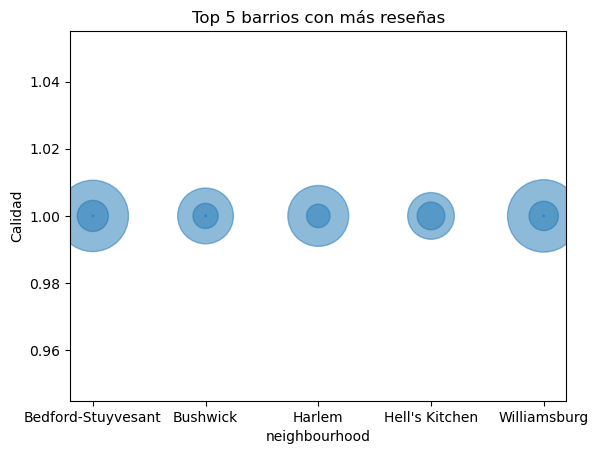

In [17]:
grouped = airbnbs.groupby('neighbourhood')['Calidad'].value_counts()
# mostrar los resultados
#print(grouped)


# Crear un dataframe con los 5 barrios y su número total de reseñas
df = pd.DataFrame({'neighbourhood': top_5_barrios.index, 'Calidad': top_5_barrios.values})
barriosresenas = pd.merge(grouped, df, on="neighbourhood")
#print(barriosresenas)


#print(df)
# Crear la figura y los ejes del diagrama de burbuja
fig, ax = plt.subplots()

# Crear el diagrama de burbuja
ax.scatter(x=barriosresenas['neighbourhood'], y=[1]*len(barriosresenas), s=barriosresenas['Calidad_x'], alpha=0.5)

# Configurar los ejes y el título
ax.set_xlabel('neighbourhood')
ax.set_ylabel('Calidad')
ax.set_title('Top 5 barrios con más reseñas')

# Mostrar el diagrama
plt.show()

Cuanto más grande la burbuja total, más número de reseñas tiene el barrio. Observamos que Bedford-Stuyvesant tiene la burbuja más grande y, por tanto, es el barrio con más reseñas. A su vez, Hell's Kitchen tiene la burbuja más pequeña y coincide que es el barrio con menos reseñas (del top 5).

Además, vemos que el círculo interior de la burbuja (azul oscuro) determina la calidad media, el azul claro determina la calidad baja, y el punto negro (del centro) las reseñas de calidad alta. Por ejemplo, Hell's Kitchen, pese a ser el barrio con menos número de reseñas, es el barrio con mayor número de reseñas de calidad media, y el barrio con menor número de reseñas de calidad baja. Por eso, podemos concluir que Hell's Kitchen es el mejor barrio para alquilar un Airbnb.

Además, podemos ver que el resto de barrios tienen mayor cantidad de reseñas de baja calidad que de media calidad. Como observamos que Bedford y Williamsburg son bastante parecidos, podemos decir que son barrios más o menos similares.

## PARTE 3
### A continuación, haremos los diagramas de cajas para entender las diferencias entre alquilar un apartamento entero, una habitación privada y una habitación compartida. Para ello, tendremos en cuenta los 5 barrios más populares.

# Diagrama de Cajas. Barrio Harlem.

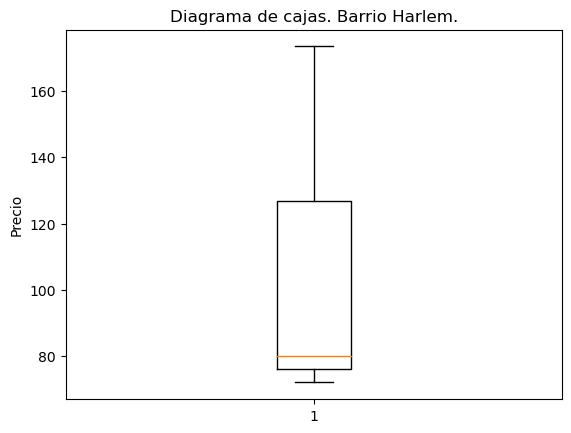

In [29]:
# A continuación, haremos el Diagrama de Cajas del barrio de Harlem.

precios_medios = airbnbs.groupby(["neighbourhood", "room_type"])["price"].mean()
precios = precios_medios.reset_index()

preciosHarlem = precios.loc[precios['neighbourhood'] == "Harlem"]
# Seleccionamos la columna "precio" para crear el diagrama de cajas
price = preciosHarlem['price']
# Creamos el diagrama de cajas
plt.boxplot(price)
# Añadimos el título y etiquetas de los ejes
plt.title('Diagrama de cajas. Barrio Harlem.')
plt.ylabel('Precio')
# Mostrar el diagrama de cajas
plt.show()

# Diagrama de Cajas. Barrio BedfordStuyvesant.

         neighbourhood        room_type       price
29  Bedford-Stuyvesant  Entire home/apt  152.197497
30  Bedford-Stuyvesant     Private room   68.107230
31  Bedford-Stuyvesant      Shared room   39.521127


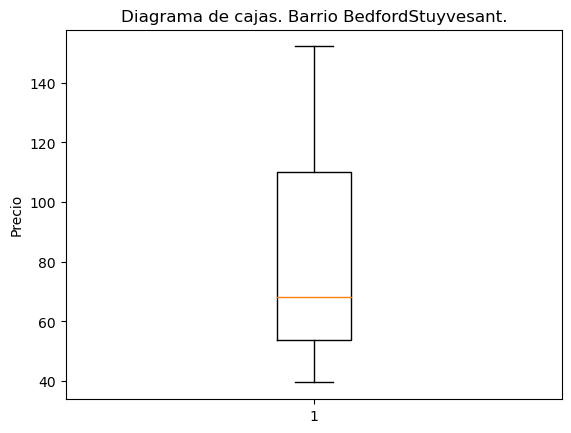

In [24]:
# A continuación, haremos el Diagrama de Cajas del barrio de BedfordStuyvesant.

preciosBedfordStuyvesant = precios.loc[precios['neighbourhood'] == "Bedford-Stuyvesant"]
print(preciosBedfordStuyvesant)
# Seleccionamos la columna "precio" para crear el diagrama de cajas
price1 = preciosBedfordStuyvesant['price']
# Creamos el diagrama de cajas
plt.boxplot(price1)
# Añadimos el título y las etiquetas de los ejes
plt.title('Diagrama de cajas. Barrio BedfordStuyvesant.')
plt.ylabel('Precio')
# Mostrar el diagrama de cajas
plt.show()

# Diagrama de Cajas. Barrio Hell's Kitchen.

      neighbourhood        room_type       price
229  Hell's Kitchen  Entire home/apt  233.377401
230  Hell's Kitchen     Private room  127.374552
231  Hell's Kitchen      Shared room   81.541176


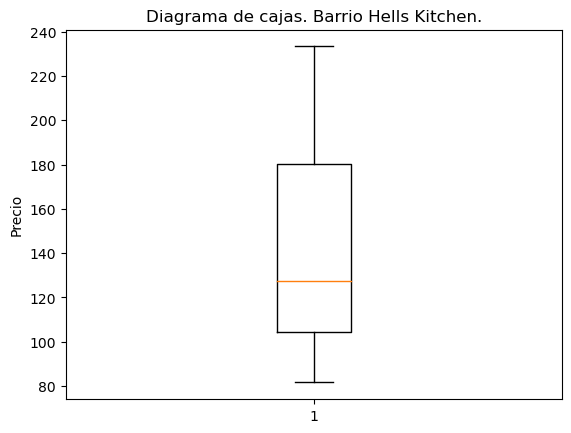

In [25]:
# A continuación, haremos el Diagrama de Cajas del barrio de Hell's Kitchen.

preciosHK = precios.loc[precios['neighbourhood'] == "Hell's Kitchen"]
print(preciosHK)
# Seleccionamos la columna "precio" para crear el diagrama de cajas
price2 = preciosHK['price']
# Creamos el diagrama de cajas
plt.boxplot(price2)
# Añadimos el título y las etiquetas de los ejes
plt.title('Diagrama de cajas. Barrio Hells Kitchen.')
plt.ylabel('Precio')
# Mostrar el diagrama de cajas
plt.show()

# Diagrama de Cajas. Barrio Bushwick.

   neighbourhood        room_type       price
63      Bushwick  Entire home/apt  141.564912
64      Bushwick     Private room   62.444611
65      Bushwick      Shared room   33.416667


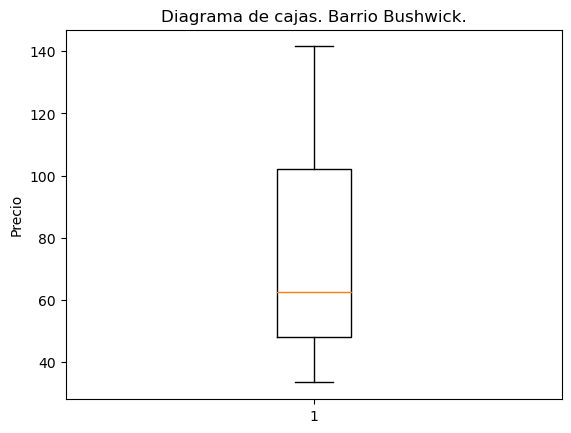

In [26]:
# A continuación, haremos el Diagrama de Cajas del barrio de Bushwick.

preciosBushwick = precios.loc[precios['neighbourhood'] == "Bushwick"]
print(preciosBushwick)
# Seleccionamos la columna "precio" para crear el diagrama de cajas.
price3 = preciosBushwick['price']
# Creamos el diagrama de cajas
plt.boxplot(price3)
# Añadimos el título y las etiquetas de los ejes
plt.title('Diagrama de cajas. Barrio Bushwick.')
plt.ylabel('Precio')
# Mostrar el diagrama de cajas
plt.show()

# Diagrama de Cajas. Barrio Williamsburg.

    neighbourhood        room_type       price
503  Williamsburg  Entire home/apt  197.137667
504  Williamsburg     Private room   83.480610
505  Williamsburg      Shared room   76.333333


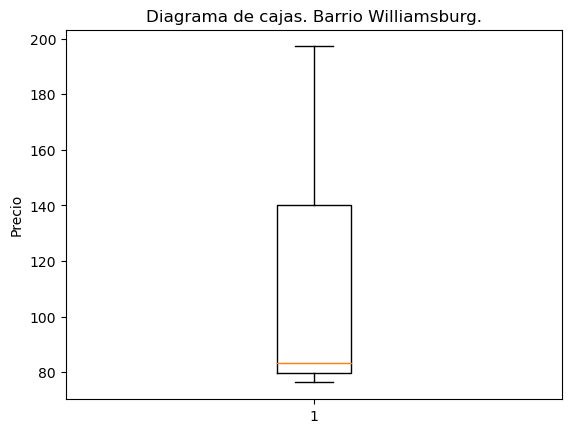

In [27]:
# A continuación, haremos el Diagrama de Cajas del barrio de Williamsburg.

preciosWilliamsburg = precios.loc[precios['neighbourhood'] == "Williamsburg"]
print(preciosWilliamsburg)
# Seleccionamos la columna "precio" para crear el diagrama de cajas
price4 = preciosWilliamsburg['price']
# Creamos el diagrama de cajas
plt.boxplot(price4)
# Añadimos el título y las etiquetas de los ejes
plt.title('Diagrama de cajas. Barrio Williamsburg.')
plt.ylabel('Precio')
# Mostramos el diagrama de cajas
plt.show()

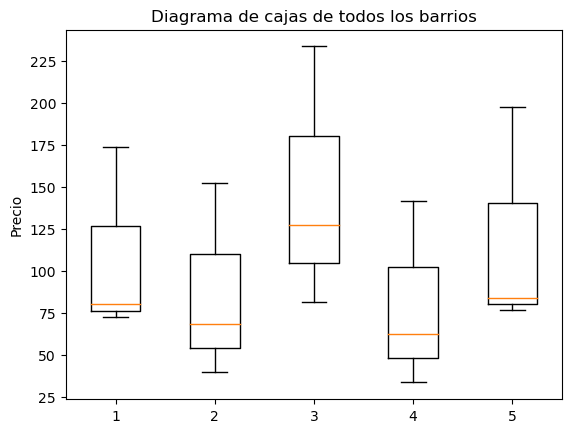

In [30]:
# A continuación, graficamos los diagramas de los 5 barrios más populares. Todos en el mismo gráfico.

plt.boxplot([price, price1, price2, price3, price4])
# Añadir título y etiquetas de los ejes
plt.title('Diagrama de cajas de todos los barrios')
#plt.xlabel('')
plt.ylabel('Precio')
plt.show()

## Interpretamos los resultados de los diagramas de cajas:

Tras hacer los diagramas de cajas de los 5 barrios más populares, podemos ver ciertas diferencias de precio entre el alquiler en distintos barrios. Es decir, el barrio más barato para alquilar una habitación compartida es Bushwick, donde una habitación vale 33.41. A su vez, es el lugar más barato para alquilar una habitación privada y un apartamento entero, con precios de 62.44 y 141.56 respectivamente. Por tanto, podemos concluir que el barrio más barato para vivir es el barrio de Bushwick. Por otra parte, podemos ver que el precio para alquilar un apartamento entero en el barrio de Hell's Kitchen es 233.37. A su vez, el precio de alquilar una habitación privada y una habitación compartida es de 127.37 y 81.54 respectivamente. Por tanto, podemos concluir que el barrio más caro para vivir es Hell's Kitchen. El precio de una habitación compartida en Hell's Kitchen es más del doble de lo que vale una habitación compartida en Bushwick.

En todos los barrios, la mitad de las casas valen más que el valor de la mediana y la otra mitad vale menos. Por tanto, por ejemplo, en el barrio de Harlem la mitad de las casas cuestan más de 80, mientras que la otra mitad cuesta menos de 80. Si la mitad de las casas valen menos de 80 y el precio más bajo es de 72, podemos decir que la mayor parte de las casas de este barrio son baratas (habitaciones compartidas o habitaciones privadas).

Esto se cumple para el resto de barrios. Es decir, en todos los barrios hay más alquileres de habitaciones compartidas que apartamentos enteros.

La mediana de alquileres del barrio Hell's Kitchen es de 127.37, mientras que el alquiler más caro de Bushwick es de 141.56. Por tanto, podemos ver que la mitad de los alquileres del barrio más caro (Hell's Kitchen) tienen un valor muy cercano a alquilar un apartamento entero en el barrio de Bushwick. El alquiler más barato de Hell's Kitchen (81.54) tiene un precio muy similar a la mediana de alquileres de Harlem (80.07) y Williamsburg (83.48). Es decir, el barrio de Hell's Kitchen es bastante más caro que el barrio de Bushwick.

## PARTE 4
### A continuación, graficaremos e interpretaremos la tendencia creciente a dejar reseñas en las aplicaciones que prestan servicios.
### Para ello, usaremos un diagrama de líneas, donde veremos de forma muy clara la tendencia creciente. Es decir, una línea ascendente.

In [32]:
# Importamos las librerias necesarias para poder depurar el dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leemos el DataSet airbnb.csv
airbnbs = pd.read_csv('./DatasetsLab1/airbnb.csv', encoding='latin-1')
airbnbs = airbnbs.dropna()


# Convertimos los valores de la columna last_review a un valor númerico de año.
airbnbs["last_review"] = pd.to_datetime(airbnbs["last_review"], format="%Y-%m-%d")

# De esta forma, vemos cuantos años hay en la columna last_review.
# Es decir, para cada año veremos el numero total de reseñas y lo añadiremos a la gráfica.
anios_diferentes = airbnbs["last_review"].dt.year.unique()
anios_diferentes_ordenados = sorted(anios_diferentes)

print("Los años diferentes en la columna 'last_review' son: ")
for anio in anios_diferentes_ordenados:
    print(anio)

# El rango de fechas en el que hay reseñas en el archivo airbnbs lo podemos ver usando el siguiente código:
fecha_min = airbnbs['last_review'].min()
fecha_max = airbnbs['last_review'].max()

# Imprimir el rango de fechas
print('El rango de fechas del archivo es desde {} hasta {}.'.format(fecha_min, fecha_max))

Los años diferentes en la columna 'last_review' son: 
2011
2012
2013
2014
2015
2016
2017
2018
2019
El rango de fechas del archivo es desde 2011-03-28 00:00:00 hasta 2019-07-08 00:00:00.


In [36]:
# Vemos el número de reseñas con fecha last_review en 2011.
# Reseñas año 2011

res2011 = airbnbs["last_review"].dt.year == 2011
res2011 = airbnbs[res2011]
num_filas = res2011.shape[0]
print(f'El dataset tiene {num_filas} filas.')
res2011.head(10)


El dataset tiene 7 filas.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
123,27883,East Village Sanctuary,120223,Jen,Manhattan,East Village,40.72245,-73.98527,Entire home/apt,100,4,25,2011-12-10,0.23,1,0
125,28396,Modern Apt with Spectacular Views,6197784,Jo,Brooklyn,Williamsburg,40.71923,-73.96468,Private room,90,1,9,2011-09-18,0.08,1,245
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
163,40039,Luxurious Condo in DUBMO with View,171851,Henry,Brooklyn,DUMBO,40.70207,-73.98571,Private room,250,3,14,2011-04-25,0.13,1,189
317,74860,"Sunlit and Cozy Williamsburg/Greenpoint, Brooklyn",394752,Allison,Brooklyn,Greenpoint,40.72488,-73.95018,Private room,55,2,1,2011-03-28,0.01,1,0
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60


In [39]:
# Vemos el número de reseñas con fecha last_review en 2012.
# Reseñas año 2012
res2012 = airbnbs["last_review"].dt.year == 2012
res2012 = airbnbs[res2012]
num_filas = res2012.shape[0]
print(f'El dataset tiene {num_filas} filas.')
res2012.head(10)


El dataset tiene 25 filas.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
102,23501,Monkey Retreat Manhattan,63318,Meka,Manhattan,Washington Heights,40.83927,-73.94281,Private room,65,2,68,2012-11-01,0.60,1,312
188,47362,"LARGE, COMFY 1BDR W/CHARACTER!!!",214148,Robert,Brooklyn,Bedford-Stuyvesant,40.68237,-73.94150,Entire home/apt,175,26,30,2012-09-03,0.29,1,364
229,59121,"Nice, clean, safe, convenient 3BR",204539,Mark,Queens,Ridgewood,40.70411,-73.89934,Entire home/apt,140,14,1,2012-09-17,0.01,5,365
315,74404,Luxury 3 bed/ 2 bath apt in Harlem w/ terrace,391325,G & S,Manhattan,Harlem,40.80276,-73.95670,Entire home/apt,250,14,31,2012-08-22,0.31,1,78
355,98330,LOVELY APARTMENT IN THE HEART OF NY,31374,Shon,Manhattan,Kips Bay,40.73877,-73.97707,Entire home/apt,125,4,1,2012-01-03,0.01,3,181
608,229874,Oversized Studio in Park Slope,507304,Derrick,Brooklyn,Sunset Park,40.66293,-73.99833,Entire home/apt,200,5,1,2012-01-02,0.01,1,0
783,281521,Amazing West Village 2br,70614,Vimal,Manhattan,West Village,40.73879,-74.00425,Entire home/apt,200,27,1,2012-10-02,0.01,1,0
924,344019,Best West Village/Meatpacking Space,1746209,R.,Manhattan,West Village,40.73104,-74.00879,Private room,195,1,7,2012-06-07,0.08,1,129
1098,464231,Large Room w/ Private Entrance,1530310,Jacques,Brooklyn,Bedford-Stuyvesant,40.68905,-73.95410,Private room,65,7,2,2012-05-29,0.02,3,0
1132,479285,Rent in beautiful Sunnyside Gardens for holidays,2374190,Jazmin,Queens,Sunnyside,40.74679,-73.91853,Private room,80,3,1,2012-12-30,0.01,1,330


In [41]:
# Vemos el número de reseñas con fecha last_review en 2013.
# Reseñas año 2013
res2013 = airbnbs["last_review"].dt.year == 2013
res2013 = airbnbs[res2013]
num_filas = res2013.shape[0]
print(f'El dataset tiene {num_filas} filas.')
res2013.head(10)


El dataset tiene 48 filas.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
151,36121,Lg Rm in Historic Prospect Heights,62165,Michael,Brooklyn,Prospect Heights,40.67386,-73.96641,Private room,85,15,9,2013-05-10,0.09,1,339
281,65834,Beautiful 1 Bedroom Apt Park Slope,321934,Jessica,Brooklyn,Park Slope,40.67319,-73.97323,Entire home/apt,175,2,11,2013-05-02,0.11,1,246
374,112100,Sunny 3BR Apt Ideal for Family,572527,Marine,Brooklyn,Crown Heights,40.67539,-73.96093,Entire home/apt,165,7,3,2013-01-01,0.03,1,157
419,141890,LUXURY SOHO 2 Bedroom Apt,689661,Allison,Manhattan,Nolita,40.72255,-73.99346,Entire home/apt,375,3,18,2013-10-01,0.21,1,0
429,148201,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,2013-05-31,0.19,1,0
481,168810,Lovely Vintage HavenâHeart of UWS,747698,Linda & Chris,Manhattan,Upper West Side,40.78569,-73.97581,Entire home/apt,175,65,11,2013-10-15,0.12,1,358
613,231414,TURQUOISE: One-Bedroom Apt. in Soho,1184442,Roberto,Manhattan,SoHo,40.72599,-74.00168,Private room,270,5,1,2013-07-09,0.01,1,210
741,268481,Resort-like living in Williamsburg,1380703,Vishal,Brooklyn,Williamsburg,40.71647,-73.93974,Entire home/apt,290,30,1,2013-09-24,0.01,1,0
777,278631,West Village NYC Sun-filled Studio!,1132207,Cathryne,Manhattan,West Village,40.73729,-74.00807,Entire home/apt,250,30,7,2013-04-21,0.08,1,35
798,285442,Huge room with private balcony,1475866,Jesper,Manhattan,East Village,40.73119,-73.98819,Private room,300,6,1,2013-05-06,0.01,1,0


In [42]:
# Vemos el número de reseñas con fecha last_review en 2014.
# Reseñas año 2014
res2014 = airbnbs["last_review"].dt.year == 2014
res2014 = airbnbs[res2014]
num_filas = res2014.shape[0]
print(f'El dataset tiene {num_filas} filas.')
res2014.head(10)


El dataset tiene 199 filas.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
203,54453,MIDTOWN WEST - Large alcove studio,255583,Anka,Manhattan,Hell's Kitchen,40.76548,-73.98474,Shared room,105,6,10,2014-01-07,0.09,1,363
308,71384,Gigantic Private Brooklyn Loft!,365153,Ben,Brooklyn,Greenpoint,40.72898,-73.95552,Entire home/apt,229,1,50,2014-05-13,0.50,1,188
399,126816,Gorgeous Upper West Side Apartment,620288,Eric,Manhattan,Upper West Side,40.79918,-73.96607,Private room,85,1,3,2014-11-06,0.03,1,0
400,127387,"Luxe, Spacious 2BR 2BA Nr Trains",23276,Katharine,Brooklyn,Gowanus,40.66862,-73.99260,Entire home/apt,260,30,3,2014-08-04,0.03,1,316
421,142069,"EAST VILLAGE STUDIO, sunny & quiet",277747,Josh,Manhattan,East Village,40.72485,-73.97813,Entire home/apt,150,4,22,2014-11-10,0.23,1,0
424,145064,The Heart of Prime Williamsburg,404424,Oliver,Brooklyn,Williamsburg,40.71943,-73.95650,Entire home/apt,145,7,8,2014-06-06,0.08,1,0
458,161394,Surfer room 15mins to downtown NYC!,772300,Alain,Brooklyn,Williamsburg,40.71309,-73.94128,Private room,90,6,3,2014-08-31,0.03,1,0
475,167017,Gorgeous Duplex + Garden,795889,Adam,Brooklyn,Park Slope,40.67853,-73.98089,Entire home/apt,219,5,2,2014-08-31,0.03,1,0
520,189181,Room in Chic Modern High Line Luxury- New!,912541,David,Manhattan,Chelsea,40.74695,-74.00454,Private room,255,4,1,2014-04-20,0.02,1,365
630,239055,Nolita Penthouse_Private Deck_Elev_,65064,Ashley & Nir,Manhattan,Chinatown,40.71892,-73.99628,Entire home/apt,300,7,2,2014-10-06,0.03,1,0


In [43]:
# Vemos el número de reseñas con fecha last_review en 2015.
# Reseñas año 2015
res2015 = airbnbs["last_review"].dt.year == 2015
res2015 = airbnbs[res2015]
num_filas = res2015.shape[0]
print(f'El dataset tiene {num_filas} filas.')
res2015.head(10)


El dataset tiene 1388 filas.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
115,26954,NYC fabulous views Manhattan's eye,115157,Nimo,Manhattan,Kips Bay,40.74294,-73.98009,Entire home/apt,199,5,38,2015-12-02,0.38,1,260
166,41513,Convenient cozy cheap apt Manhattan,181167,Lorenzo,Manhattan,Harlem,40.82704,-73.94907,Entire home/apt,80,3,2,2015-11-02,0.04,1,0
189,47370,Chelsea Studio sublet 1 - 2 months,214287,Alex,Manhattan,Chelsea,40.74031,-73.99999,Entire home/apt,125,3,3,2015-07-17,0.03,1,0
199,53469,cozy studio with parking spot,204539,Mark,Queens,Middle Village,40.71722,-73.87856,Entire home/apt,98,30,33,2015-05-09,0.31,5,240
200,53470,Clean and convenient 2BR apartment,204539,Mark,Queens,Ridgewood,40.70234,-73.89816,Private room,140,7,6,2015-10-08,0.06,5,365
241,61167,Colorful Private One Bedroom Apt,295760,Greta,Manhattan,Little Italy,40.71961,-73.99540,Entire home/apt,135,2,21,2015-12-12,0.20,1,0
314,74333,Alcove Studio w/ outdoor Patio Deck,331328,Amir,Manhattan,East Harlem,40.80892,-73.93985,Entire home/apt,113,14,26,2015-11-25,0.27,3,253
367,105469,Oceanfront Apartment in Rockaway,547386,Michelle,Queens,Rockaway Beach,40.58615,-73.81245,Private room,70,27,13,2015-09-21,0.13,1,335
450,158913,"Nice, cozy, neat apt Greenpoint,BK",762563,Lennny & Megan,Brooklyn,Greenpoint,40.72489,-73.95494,Entire home/apt,130,5,4,2015-03-13,0.05,1,0
473,166983,"3 BR, Beautiful Brooklyn Duplex",795640,Jilly,Brooklyn,Carroll Gardens,40.68252,-73.99619,Entire home/apt,350,5,6,2015-08-08,0.06,1,0


In [44]:
# Vemos el número de reseñas con fecha last_review en 2016.
# Reseñas año 2016
res2016 = airbnbs["last_review"].dt.year == 2016
res2016 = airbnbs[res2016]
num_filas = res2016.shape[0]
print(f'El dataset tiene {num_filas} filas.')
res2016.head(10)


El dataset tiene 2703 filas.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
88,20300,Great Location for NYC,76627,Pas,Manhattan,East Village,40.72912,-73.98057,Private room,50,1,2,2016-02-14,0.05,1,0
142,32331,"Sunny, Cobble Hill Apartment",139874,Sarah,Brooklyn,Cobble Hill,40.68570,-73.99183,Entire home/apt,140,2,4,2016-04-24,0.04,1,0
164,40453,Charming & Cozy midtown loft any WEEK ENDS !!!,174025,Sylvia,Manhattan,Upper East Side,40.76123,-73.96420,Entire home/apt,250,3,4,2016-09-23,0.08,1,365
172,44161,Light+Open+Airy+Rustic+Modern Loft,193360,Young,Brooklyn,Williamsburg,40.71045,-73.96770,Entire home/apt,150,2,193,2016-07-06,1.78,1,177
178,45393,Greenwich Village Stylish Apartment,201297,Myrna,Manhattan,West Village,40.73423,-74.00460,Entire home/apt,150,26,38,2016-04-20,0.36,1,225
232,59855,One bedroom Apt. in NYC,288031,Leslie,Manhattan,Midtown,40.75890,-73.96991,Entire home/apt,250,30,82,2016-01-05,0.78,1,0
259,63573,Small tidy bedroom in duplex,310458,Emily,Brooklyn,Park Slope,40.66793,-73.98327,Private room,60,14,9,2016-08-29,0.09,2,0
298,68900,Bright Beautiful Brooklyn,343250,Jason,Brooklyn,Greenpoint,40.73119,-73.95578,Private room,125,3,6,2016-11-13,0.10,1,325
323,78919,"Historic House Boerum Hill, BK, NYC",422561,Nancy,Brooklyn,Boerum Hill,40.68674,-73.98876,Entire home/apt,135,4,6,2016-02-05,0.10,1,0


In [45]:
# Vemos el número de reseñas con fecha last_review en 2017.
# Reseñas año 2017
res2017 = airbnbs["last_review"].dt.year == 2017
res2017 = airbnbs[res2017]
num_filas = res2017.shape[0]
print(f'El dataset tiene {num_filas} filas.')
res2017.head(10)


El dataset tiene 3203 filas.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
27,9357,Midtown Pied-a-terre,30193,Tommi,Manhattan,Hell's Kitchen,40.76715,-73.98533,Entire home/apt,150,10,58,2017-08-13,0.49,1,75
48,13050,bright and stylish duplex,50846,Jennifer,Brooklyn,Bedford-Stuyvesant,40.68554,-73.94090,Entire home/apt,115,3,11,2017-01-01,0.10,1,0
64,16338,Double Room w Private Deck Clinton Hill Best Area,63613,Patricia,Brooklyn,Clinton Hill,40.69000,-73.96788,Private room,55,7,27,2017-09-30,0.23,2,292
66,16458,Light-filled 2B duplex in the heart of Park Sl...,64056,Sara,Brooklyn,Park Slope,40.67343,-73.98338,Entire home/apt,225,3,4,2017-09-24,0.16,1,0
109,26012,Sunny 2-story Brooklyn townhouse w deck and ga...,109589,Jessica,Brooklyn,Gowanus,40.68157,-73.98989,Entire home/apt,200,30,19,2017-03-17,0.20,1,208
112,26559,Beautiful Apartment East Village,112793,Sally,Manhattan,East Village,40.72880,-73.98192,Entire home/apt,140,7,12,2017-12-11,0.13,1,164
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298
126,28907,Garden studio in the Upper East Sid,124352,Lisa,Manhattan,Upper East Side,40.77800,-73.94822,Entire home/apt,150,5,21,2017-08-15,0.19,1,189


In [46]:
# Vemos el número de reseñas con fecha last_review en 2018.
# Reseñas año 2018
res2018 = airbnbs["last_review"].dt.year == 2018
res2018 = airbnbs[res2018]
num_filas = res2018.shape[0]
print(f'El dataset tiene {num_filas} filas.')
res2018.head(10)


El dataset tiene 6047 filas.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
42,12303,1bdr w private bath. in lofty apt,47618,Yolande,Brooklyn,Fort Greene,40.69673,-73.97584,Private room,120,7,25,2018-09-30,0.23,1,311
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
71,17037,Lovely EV Artist's Home,66035,Anna,Manhattan,East Village,40.72162,-73.98008,Entire home/apt,230,9,49,2018-05-14,0.43,1,116
86,19812,2 bedroom Williamsburg Apt - Bedford L stop,74857,Starlee,Brooklyn,Williamsburg,40.71833,-73.95748,Entire home/apt,105,3,61,2018-08-09,0.53,1,272
94,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,2018-10-09,0.11,1,365
99,22911,The Stuydio Modern and Light Filled,87773,Shelly,Brooklyn,Bedford-Stuyvesant,40.68413,-73.92357,Entire home/apt,125,7,139,2018-10-28,1.23,2,311


In [47]:
# Vemos el número de reseñas con fecha last_review en 2019.
# Reseñas año 2019
res2019 = airbnbs["last_review"].dt.year == 2019
res2019 = airbnbs[res2019]
num_filas = res2019.shape[0]
print(f'El dataset tiene {num_filas} filas.')
res2019.head(10)


El dataset tiene 25201 filas.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,2019-07-05,0.91,1,333
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46


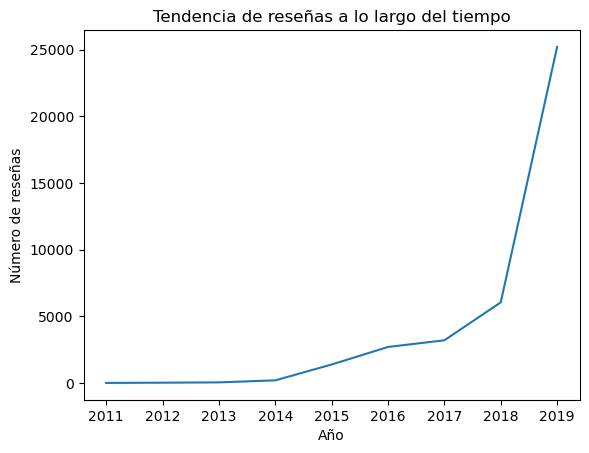

In [49]:
# Agrupamos por año y contamos el número de reseñas.
resenas_por_anio = airbnbs.groupby(airbnbs['last_review'].dt.year)['number_of_reviews'].count()

# Creamos el diagrama de líneas. A partir de las reseñas por año. Las reseñas por año tienen en cuenta la fecha de última reseña.
plt.plot(resenas_por_anio.index, resenas_por_anio.values)
plt.xlabel('Año')
plt.ylabel('Número de reseñas')
plt.title('Tendencia de reseñas a lo largo del tiempo')
plt.show()

## Interpretamos los resultados de la gráfica de reseñas con tendencia ascendente:

Tal y como se refleja en el enunciado de la práctica, se intuye que la tendencia a dejar reseñas en las aplicaciones que prestan servicios ha aumentado en los últimos años. Como podemos comprobar, esto es cierto. Hay 7 apartamentos con la última reseña en 2011, 25 apartamentos con la última reseña en 2012 y 48 apartamentos con la última reseña en 2013. Los apartamentos que tienen fecha de última reseña en esos años son muy pocos, ya que con el paso del tiempo la tendencia a dejar reseñas ha aumentado y la mayoría de apartamentos han obtenido reseñas más recientes.

También podemos observar que la tendencia a dejar reseñas ha aumentado haciendo hincapié en las reseñas por mes. Por ejemplo, en 2011 las reseñas por mes tenían valores muy bajos, mientras que en 2019 hay apartamentos que han llegado a obtener una media de 4.64 reseñas por mes. Esto nos muestra claramente que la tendencia a dejar reseñas ha aumentado.
